# Table of Contents

1. [Load Project](##Load-Project) 
2. [Calculate Step Length and Turn Angle](#Calculate-Step-Length-and-Turn-Angle)
    1. [Visualize Step and Angle Distribution](#Visualize-Step-and-Angle-Distribution)
3. [Run CoMPASS Level 1](#Run-CoMPASS-Level-1)
    1. [Check Results](#Check-results)
4. [Export HMM results](#Export-HMM-results---model-and-data)

# Load Project

In [1]:
from pathlib import Path
import pandas as pd
from compass_labyrinth import load_project


project_path = Path(r'D:\Gladstone Dropbox\Palop Lab\Patrick\DeepLabCut Projects\AppSAA_DSI_CoMPASS_Test_2')

# Import config and metadata
config, cohort_metadata = load_project(project_path=project_path)

# Import all sessions combined pose-estimation CSV
df_all_csv = pd.read_csv(project_path / "csvs" / "combined" / "Preprocessed_combined_file_exclusions.csv")

df_all_csv

,x,y,Grid Number,likelihood,S_no,Region,Session,Genotype,Sex,NodeType,Velocity
0,264.388336,891.242676,47,0.882349,705,entry_zone,2,AppSAA,Female,Entry Nodes,0.000000
1,265.868744,880.357544,47,0.884285,706,entry_zone,2,AppSAA,Female,Entry Nodes,54.926702
2,265.803223,880.356262,47,0.870045,707,entry_zone,2,AppSAA,Female,Entry Nodes,0.327669
3,265.660767,874.519226,47,0.993272,708,entry_zone,2,AppSAA,Female,Entry Nodes,29.193871
4,267.335968,875.129028,47,0.975496,709,entry_zone,2,AppSAA,Female,Entry Nodes,8.913695
...,...,...,...,...,...,...,...,...,...,...,...
578077,256.991150,844.630615,47,0.995856,218482,entry_zone,11,WT,Male,Entry Nodes,360.397450
578078,257.961243,845.421814,47,0.997331,218483,entry_zone,11,WT,Male,Entry Nodes,6.259144
578079,253.797043,845.797302,47,0.995143,218484,entry_zone,11,WT,Male,Entry Nodes,20.905473
578080,252.432648,850.713013,47,0.994392,218485,entry_zone,11,WT,Male,Entry Nodes,25.507736


In [9]:
final_df

,ID,step,angle,x,y,Grid Number,likelihood,S_no,Region,Session,Genotype,Sex,NodeType,Velocity
0,2,0.065534,-1.686410,265.803223,880.356262,47,0.870045,707,entry_zone,2,AppSAA,Female,Entry Nodes,0.327669
1,2,5.838774,1.526836,265.660767,874.519226,47,0.993272,708,entry_zone,2,AppSAA,Female,Entry Nodes,29.193871
2,2,1.782739,1.944304,267.335968,875.129028,47,0.975496,709,entry_zone,2,AppSAA,Female,Entry Nodes,8.913695
3,2,0.035214,2.642867,267.301147,875.134277,47,0.975989,710,entry_zone,2,AppSAA,Female,Entry Nodes,0.176070
4,2,7.718045,2.699118,273.705383,870.826843,47,0.996928,711,entry_zone,2,AppSAA,Female,Entry Nodes,38.590227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465542,11,72.079490,3.104159,256.991150,844.630615,47,0.995856,218482,entry_zone,11,WT,Male,Entry Nodes,360.397450
465543,11,1.251829,-0.825318,257.961243,845.421814,47,0.997331,218483,entry_zone,11,WT,Male,Entry Nodes,6.259144
465544,11,4.181095,2.367490,253.797043,845.797302,47,0.995143,218484,entry_zone,11,WT,Male,Entry Nodes,20.905473
465545,11,5.101547,-1.210126,252.432648,850.713013,47,0.994392,218485,entry_zone,11,WT,Male,Entry Nodes,25.507736


# Calculate Step Length and Turn Angle

In [2]:
from compass_labyrinth.compass.level_1 import prep_data


# Run prep
final_df = prep_data(
    data=df_all_csv,
    type="UTM",                         # or "LL" if lon/lat in coordNames
    coordNames=("x", "y"),
    covNames=[],  # example covariates if present
    centers=None,                       # e.g., np.array([[0,0], [10,10]])
    centroids=None,                     # e.g., {"goal": goal_df_with_time}
    angleCovs=None,
    altCoordNames=None
)

print("\nSummary: Step")
print(final_df["step"].describe())

print("\nSummary: Angle (radians)")
print(final_df["angle"].describe())

d:\Gladstone Dropbox\Palop Lab\Patrick\Code\CoMPASS-Labyrinth\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
D:\Gladstone Dropbox\Palop Lab\Patrick\Code\CoMPASS-Labyrinth\src\compass_labyrinth\compass\level_1\prep_data.py:159: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for _id, g in df.groupby("ID", sort=False):



Summary: Step
count    465547.000000
mean         15.818656
std          19.054738
min           0.000010
25%           2.056677
50%           7.762025
75%          24.422047
max         287.889601
Name: step, dtype: float64

Summary: Angle (radians)
count    465547.000000
mean          0.011322
std           1.579494
min          -3.141592
25%          -0.814657
50%          -0.013872
75%           0.830959
max           3.141575
Name: angle, dtype: float64


### Visualize Step and Angle Distribution

Figure saved at: D:\Gladstone Dropbox\Palop Lab\Patrick\DeepLabCut Projects\AppSAA_DSI_CoMPASS_Test_2\figures\step_and_angle_distribution.pdf


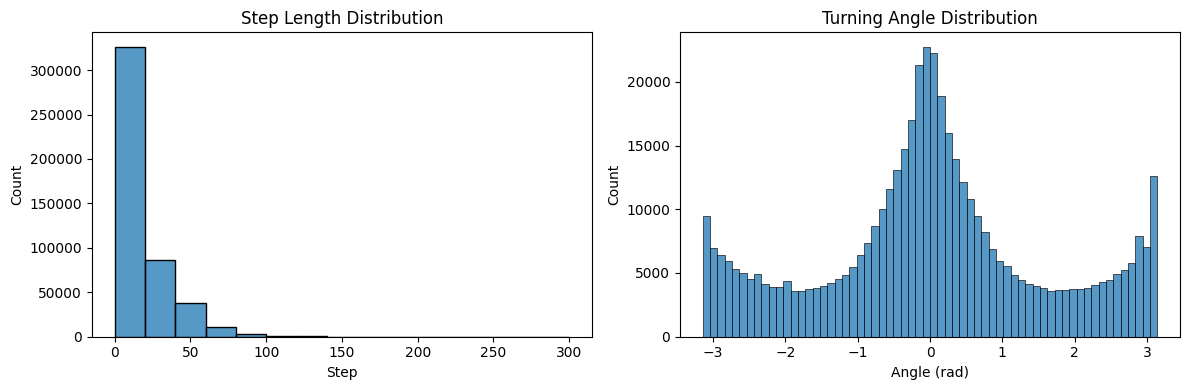

In [3]:
from compass_labyrinth.compass.level_1 import plot_step_and_angle_distributions

plot_step_and_angle_distributions(
    config=config,
    df=final_df,
)

# Run CoMPASS Level-1

Goal                               	R (momentuHMM)	                                  Python (SciPy analogue)
___________________________________________________________________________________________________________________________
Gradient-based optimization	      "BFGS", "L-BFGS-B"	                                 "BFGS", "L-BFGS-B"
Derivative-free (simplex)	         "Nelder-Mead"                                      	"Nelder-Mead"
Derivative-free (Newton-like)	         "nlm"                                              	"Powell

In [ ]:
from compass_labyrinth.compass.level_1 import fit_best_hmm
import numpy as np


# final_df must have: 'Session', 'step' (>0), 'angle' (radians)
res = fit_best_hmm(
    preproc_df=final_df,
    n_states=2, 
    n_repetitions=10,
    opt_methods=["L-BFGS-B", "BFGS", "Nelder-Mead", "Powell"],
    max_iter=50,
    use_abs_angle=(True, False),          # True => |angle|~Gamma ; False => angle~VM
    stationary_flag="auto",
    use_data_driven_ranges=True,
    angle_mean_biased=(np.pi/2, 0.0),     # used for VM branch
    session_col="Session",
    seed=123,
    enforce_behavioral_constraints=True,
    show_progress=True
)

### Check results

- State 1 = low step + high turn angle
- State 2 = high step + low turn angle

In [5]:
from compass_labyrinth.compass.level_1 import print_hmm_summary


print_hmm_summary(res.summary, res.model)

res.data.head()          # original df + HMM_State + posteriors


 Best Model Characteristics:
• Angle type: von Mises
• Optimizer: L-BFGS-B
• AIC: 4660823.34 | logLik: -2330400.67
• Start probs: [1.0, 0.0]
• Transmat:
 [[0.9135 0.0865]
 [0.1664 0.8336]]
• Step Means: [8.1174, 30.6321]
• VM mu: [2.138, -0.02]
• VM kappa: [-0.118, 4.723]
• Met behavioral constraints: False
• Final state ordering: State 1 = low step + high turn; State 2 = high step + low turn



,ID,step,angle,x,y,Grid Number,likelihood,S_no,Region,Session,Genotype,Sex,NodeType,Velocity,HMM_State,Post_Prob_1,Post_Prob_2
0,2,0.065534,-1.686410,265.803223,880.356262,47,0.870045,707,entry_zone,2,AppSAA,Female,Entry Nodes,0.327669,1.0,NaN,NaN
1,2,5.838774,1.526836,265.660767,874.519226,47,0.993272,708,entry_zone,2,AppSAA,Female,Entry Nodes,29.193871,1.0,NaN,NaN
2,2,1.782739,1.944304,267.335968,875.129028,47,0.975496,709,entry_zone,2,AppSAA,Female,Entry Nodes,8.913695,1.0,NaN,NaN
3,2,0.035214,2.642867,267.301147,875.134277,47,0.975989,710,entry_zone,2,AppSAA,Female,Entry Nodes,0.176070,1.0,NaN,NaN
4,2,7.718045,2.699118,273.705383,870.826843,47,0.996928,711,entry_zone,2,AppSAA,Female,Entry Nodes,38.590227,1.0,NaN,NaN


In [6]:
res.data.HMM_State.value_counts()

HMM_State
1.0    305520
2.0    160027
Name: count, dtype: int64

# Export HMM results - model and data

In [7]:
res.save(config=config)

  ✓ Saved model summary: model_summary.json
  ✓ Saved data with states: data_with_states.csv
  ✓ Saved model selection records: model_selection_records.csv
  ✓ Saved fitted model: fitted_model.joblib

📁 All CoMPASS Level 1 results saved to: D:\Gladstone Dropbox\Palop Lab\Patrick\DeepLabCut Projects\AppSAA_DSI_CoMPASS_Test_2\results\compass_level_1
